In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mnist-in-csv/mnist_test.csv
/kaggle/input/mnist-in-csv/mnist_train.csv


In [29]:
df = pd.read_csv('/kaggle/input/mnist-in-csv/mnist_train.csv')

In [30]:
import matplotlib.pyplot as plt


In [31]:
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


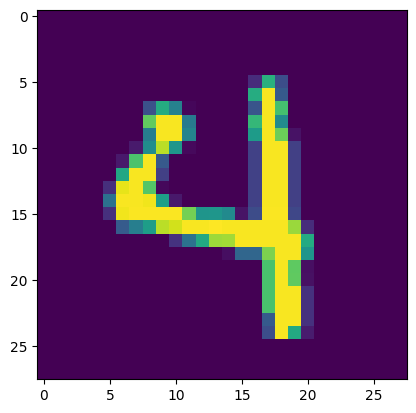

In [32]:
plt.imshow(df.iloc[18306 , 1:].values.reshape(28 , 28))

In [33]:
X = df.iloc[: , 1:]
y = df.iloc[: , 0]

In [34]:
X

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [38]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train , y_train)

KNeighborsClassifier()

In [40]:
y_pred = model.predict(X_test)

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1805
           1       0.95      0.99      0.97      1994
           2       0.94      0.93      0.94      1759
           3       0.93      0.94      0.93      1846
           4       0.95      0.93      0.94      1726
           5       0.93      0.92      0.92      1653
           6       0.96      0.98      0.97      1787
           7       0.94      0.94      0.94      1937
           8       0.97      0.88      0.92      1730
           9       0.92      0.93      0.92      1763

    accuracy                           0.94     18000
   macro avg       0.94      0.94      0.94     18000
weighted avg       0.94      0.94      0.94     18000



In [42]:
from sklearn.decomposition import PCA

In [43]:
pca = PCA(n_components = 100)

In [44]:
X_train_100 = pca.fit_transform(X_train)
X_test_100  = pca.transform(X_test)

In [24]:
X_train.shape

(42000, 100)

In [46]:
model.fit(X_train_100, y_train)

KNeighborsClassifier()

In [47]:
y_pred = model.predict(X_test_100)

In [48]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1805
           1       0.97      0.99      0.98      1994
           2       0.95      0.96      0.95      1759
           3       0.95      0.94      0.95      1846
           4       0.96      0.96      0.96      1726
           5       0.94      0.94      0.94      1653
           6       0.97      0.98      0.98      1787
           7       0.96      0.95      0.96      1937
           8       0.96      0.92      0.94      1730
           9       0.93      0.94      0.94      1763

    accuracy                           0.96     18000
   macro avg       0.96      0.96      0.96     18000
weighted avg       0.96      0.96      0.96     18000



**Visualizing 784 dimension data into 2d coordinate system**

In [49]:
pca = PCA(n_components= 2)
X_train_2 = pca.fit_transform(X_train)
X_test_2 = pca.transform(X_test)

In [53]:
import plotly.express as px
y_train_2 = y_train.astype(str)
fig = px.scatter(x = X_train_2[: , 0] , y = X_train_2[: , 1]
                , color = y_train_2 ,
                color_discrete_sequence=px.colors.qualitative.G10)

fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


**Visualizing 784 dimension data into 3d coordinate system**

In [54]:
pca = PCA(n_components= 3)
X_train_3 = pca.fit_transform(X_train)
X_test_3 = pca.transform(X_test)

In [55]:
y_train_3 = y_train.astype(str)
fig = px.scatter_3d(df , x = X_train_3[: , 0] , y = X_train_3[: , 1] 
                   , z = X_train_3[: , 2] , color = y_train_3)

fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

